In [20]:
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [21]:
def smooth(y,w=7,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [22]:
alpha = '1.0'
demand_df = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format(alpha))
supply_df = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format(alpha))

# alpha = '1.0_2'
# demand_df = pd.read_csv('csv/1.1/demand_{}.csv'.format(alpha))
# supply_df = pd.read_csv('csv/1.1/supply_{}.csv'.format(alpha))

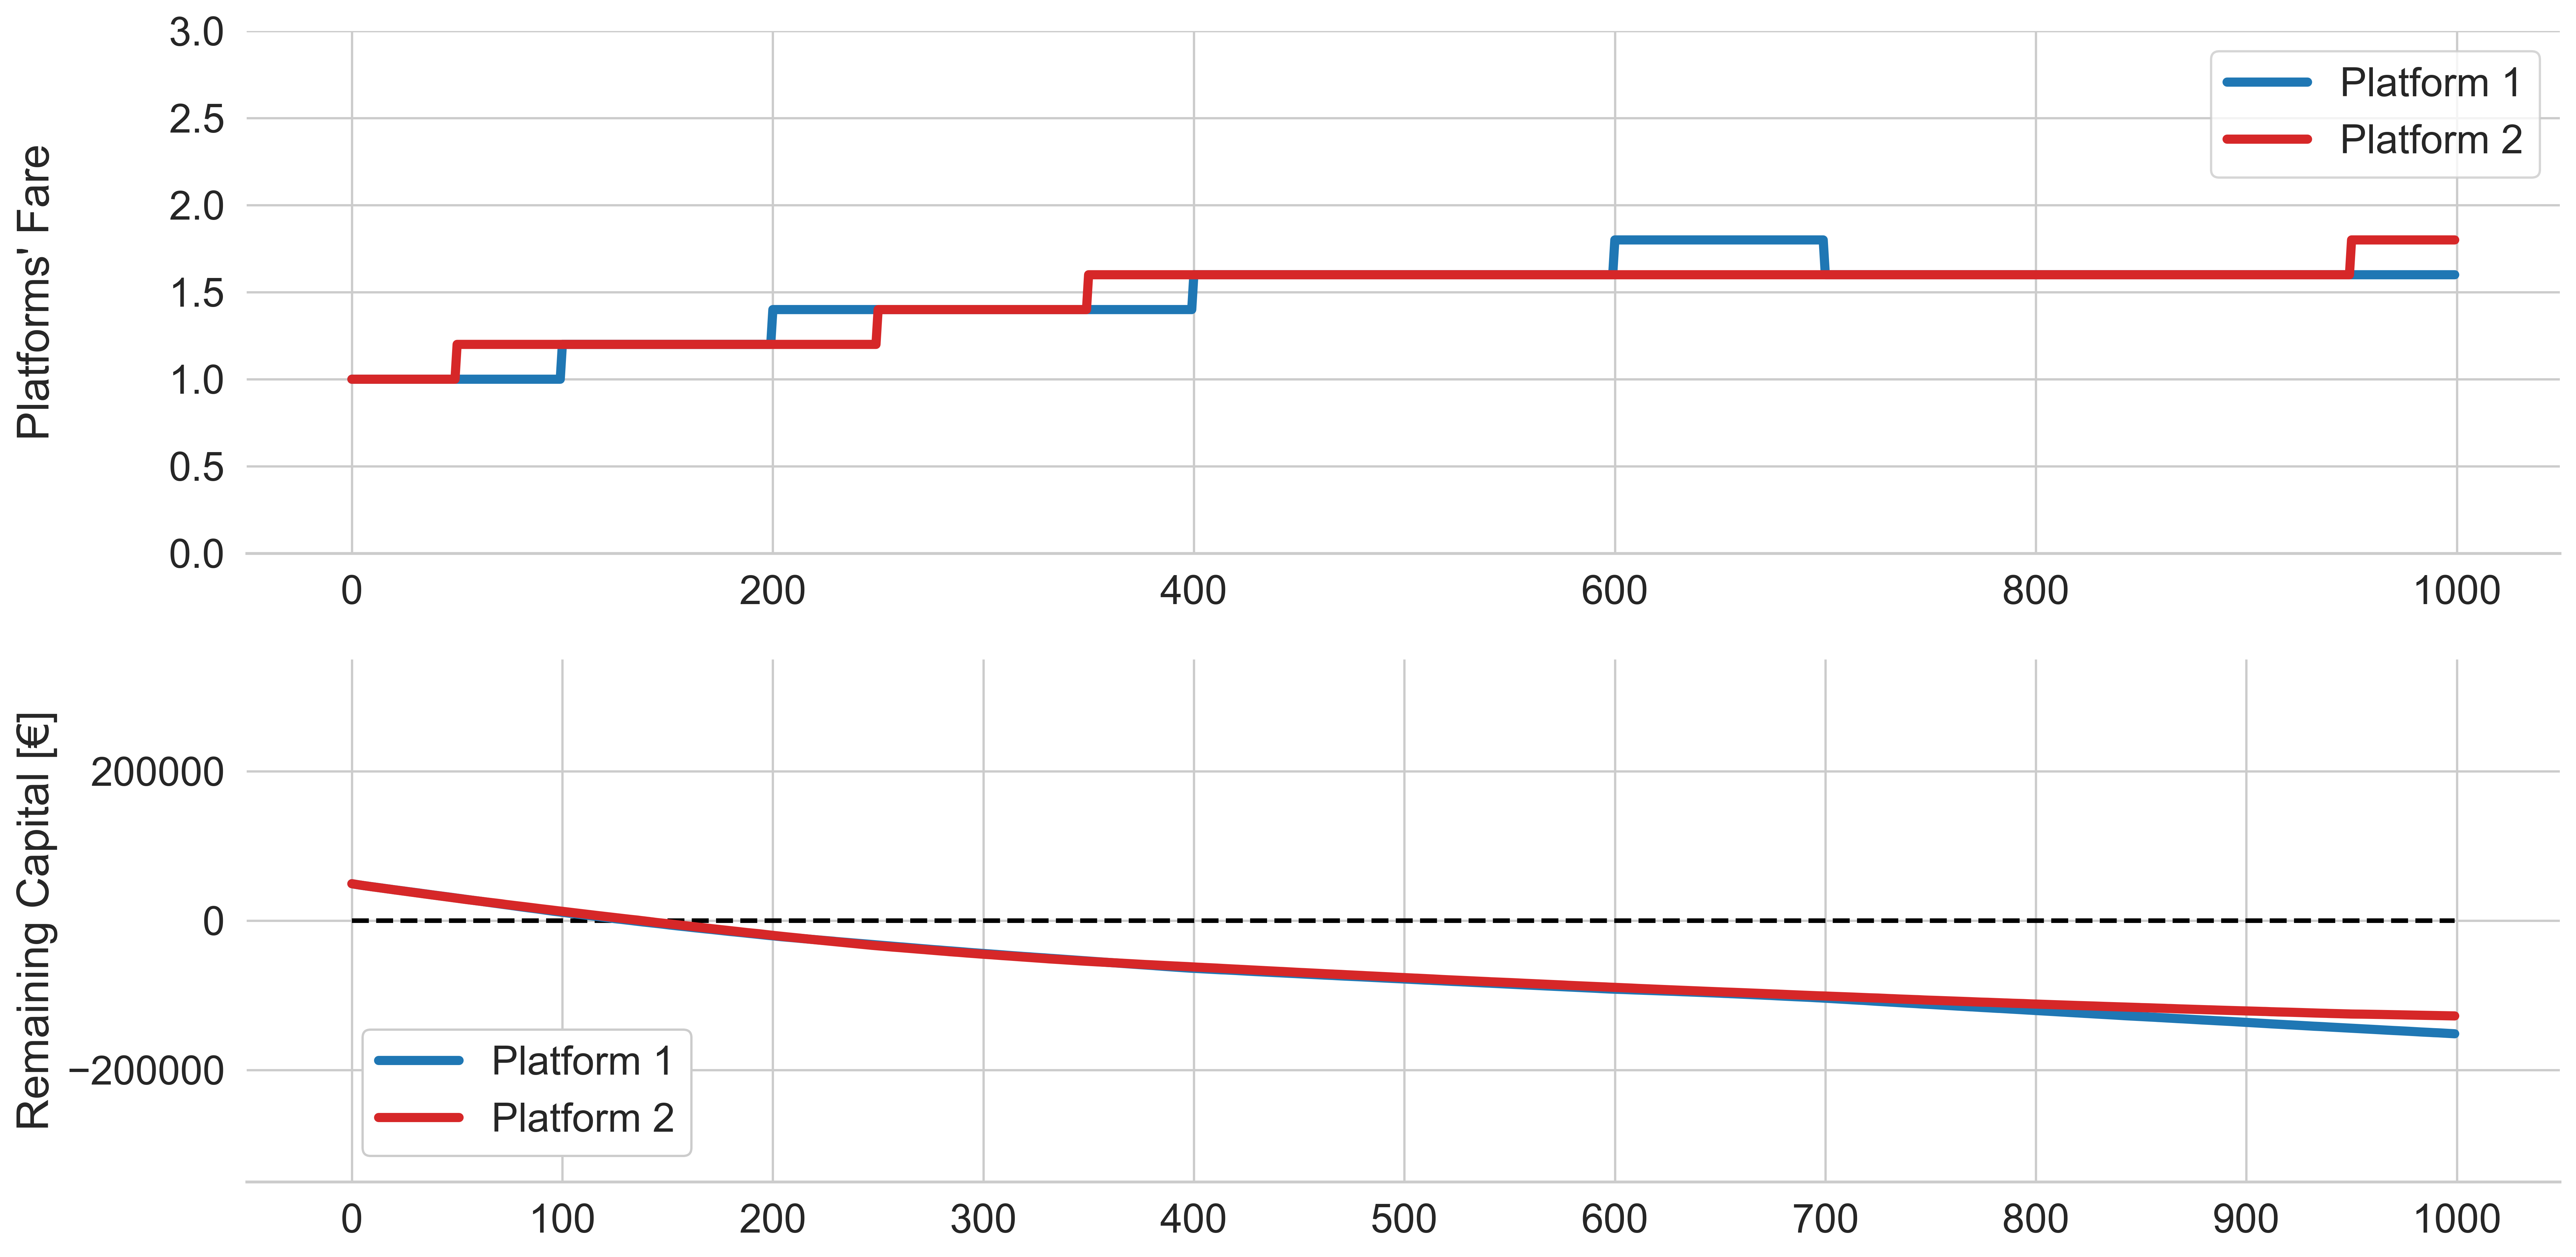

In [23]:
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=demand_df.P1_fare, label = 'Platform 1', color=c1, lw=4, ax=ax[0])
sns.lineplot(x=demand_df.index, y=demand_df.P2_fare, label = 'Platform 2', color=c2, lw=4, ax=ax[0])
ax[0].set(xlabel='', ylabel="Platforms' Fare", ylim = (0, 3))


sns.lineplot(x=demand_df.index, y=demand_df.P1_remaining_capital, label = 'Platform 1', color=c1, lw=4, ax=ax[1])
sns.lineplot(x=demand_df.index, y=demand_df.P2_remaining_capital, label = 'Platform 2', color=c2, lw=4, ax=ax[1])
ax[1].set(xlabel='', ylabel='Remaining Capital [€]', ylim = (-350000, 350000))
ax[1].legend(frameon=True,framealpha=1, loc=(0.05,0.05))

ax[1].hlines([0], 0, demand_df.index.max(), linestyles='dashed', colors='black', lw=2)

v_grid = np.arange(0, demand_df.index.max() + 2, 100)
ax[1].set_xticks(v_grid)

fig.align_ylabels()
plt.tight_layout()
# plt.savefig('Figs_0.1/PF_RC_{}.png'.format(alpha))

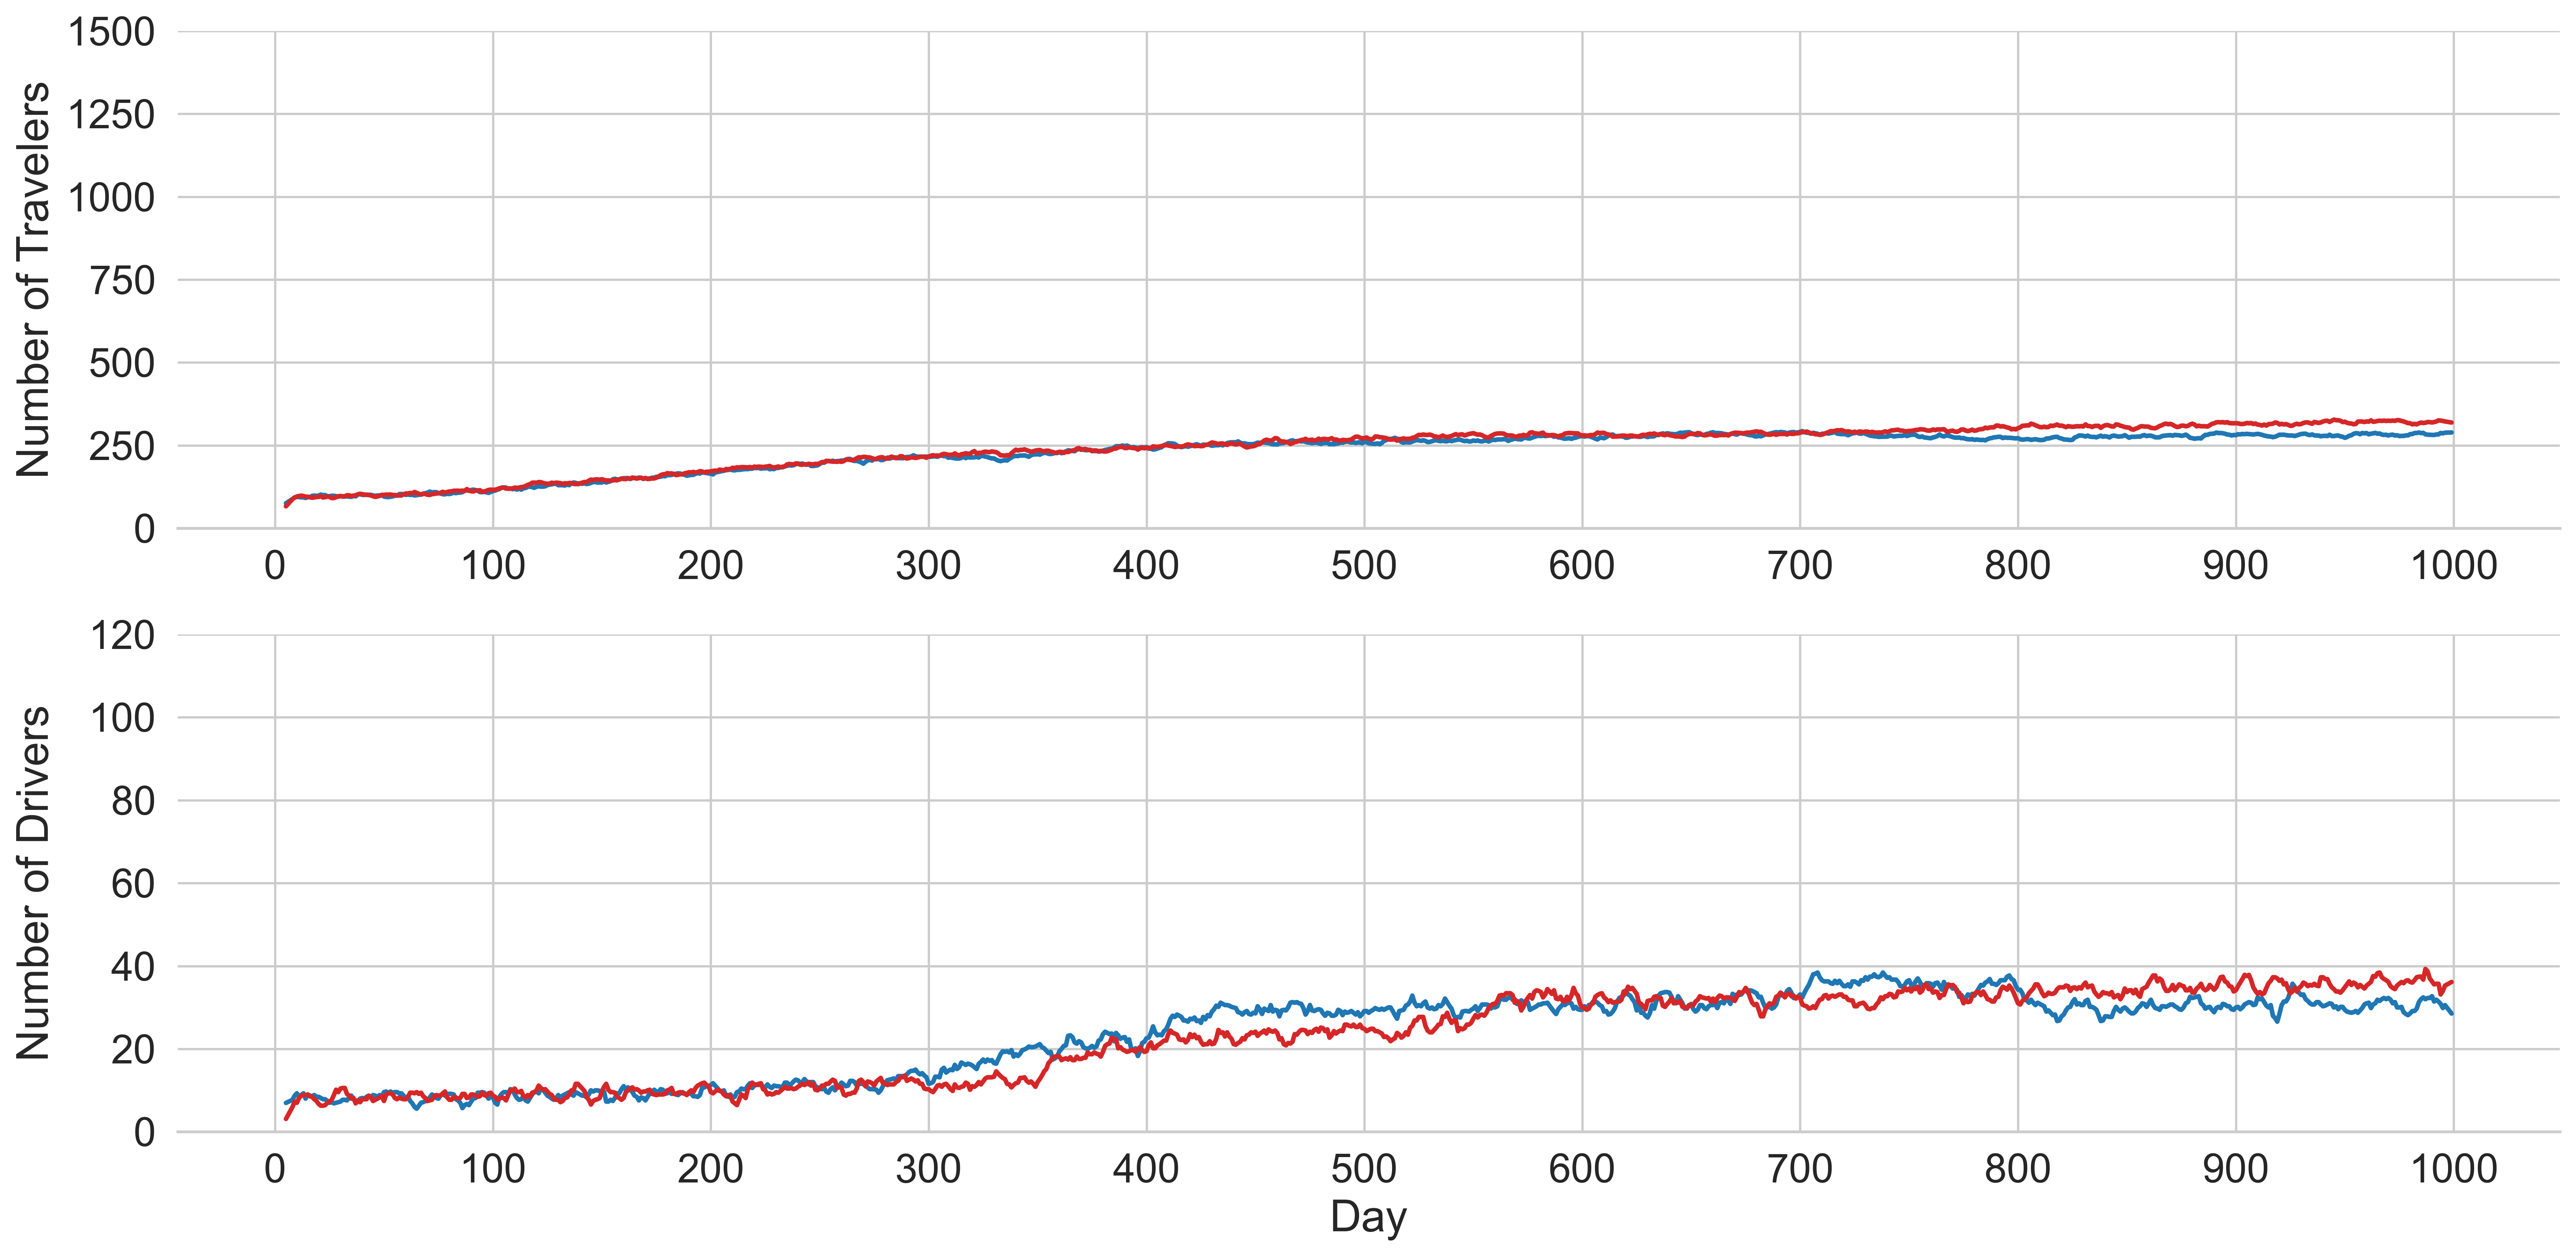

In [19]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_OUT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_OUT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel='Number of Travelers', ylim=(0,1500))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_OUT), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_OUT), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Number of Drivers', ylim=(0,120))

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
# plt.savefig('Figs_0.1/NP_NV_{}.png'.format(alpha))

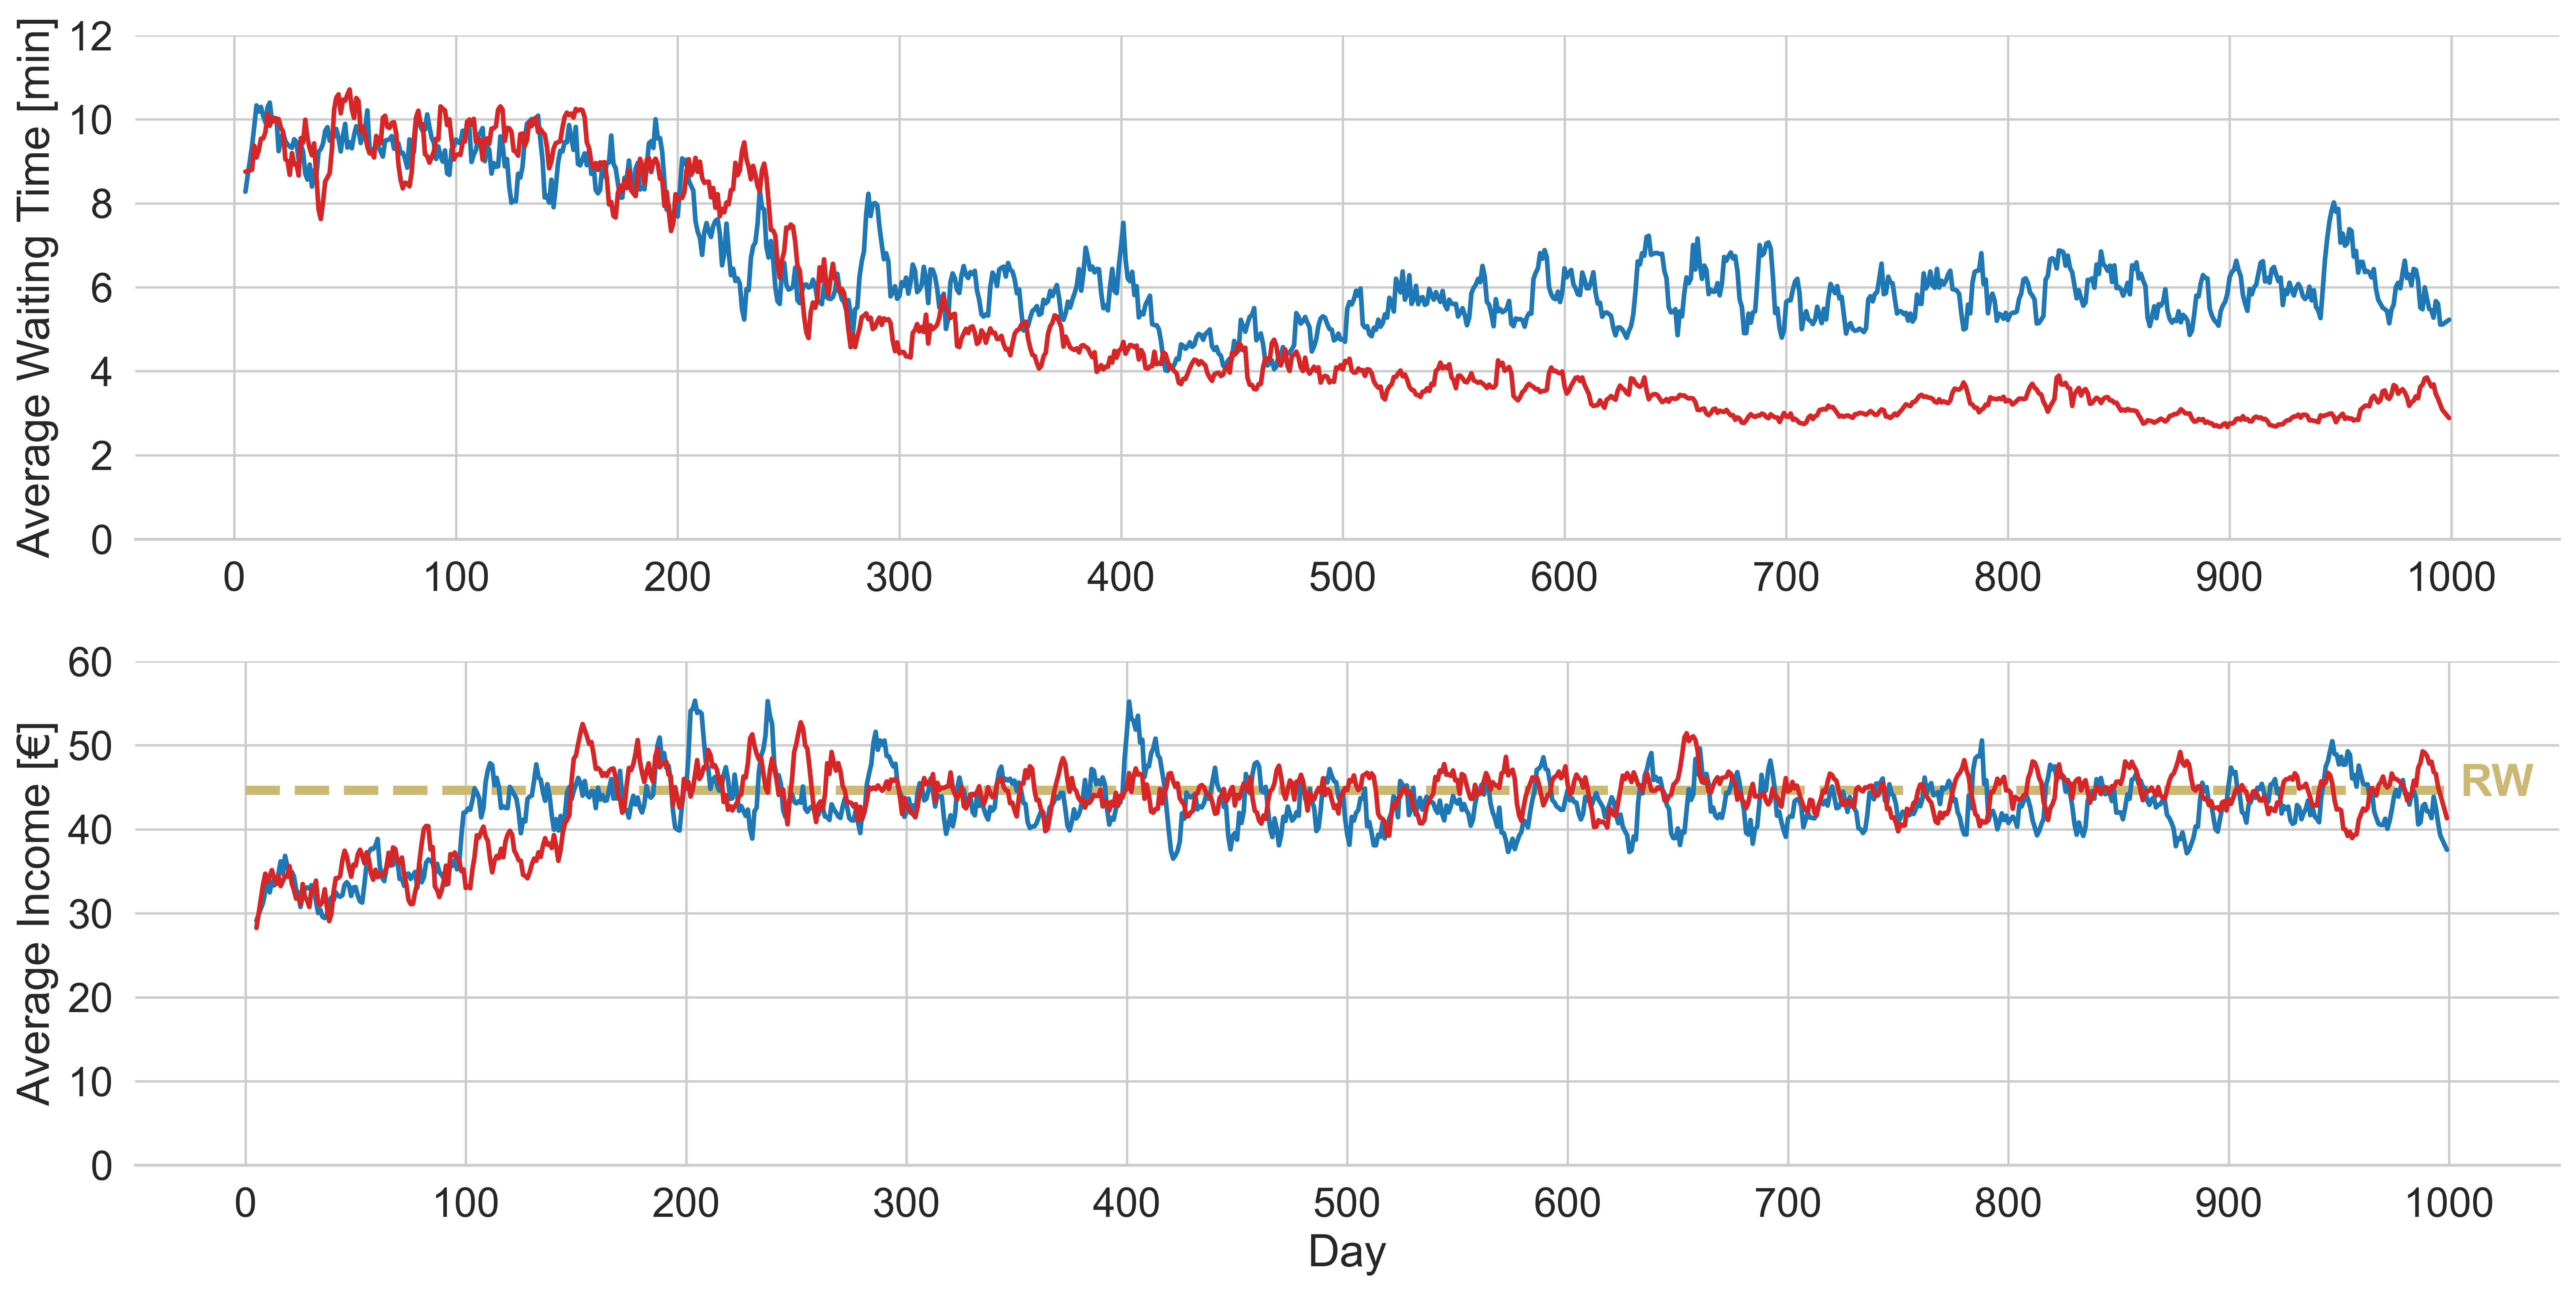

In [6]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'
RW = 4*11.16

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_ACTUAL_WT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_ACTUAL_WT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel="Average Waiting Time [min]", ylim=(0,12))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_ACTUAL_INC), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_ACTUAL_INC), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Average Income [€]', ylim=(0,60))

ax[1].hlines([RW], 0, 1000, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(1005,44), fontweight='bold', color='y')    

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
# plt.savefig('Figs_0.1/AWT_AI_{}.png'.format(alpha))

<AxesSubplot:>

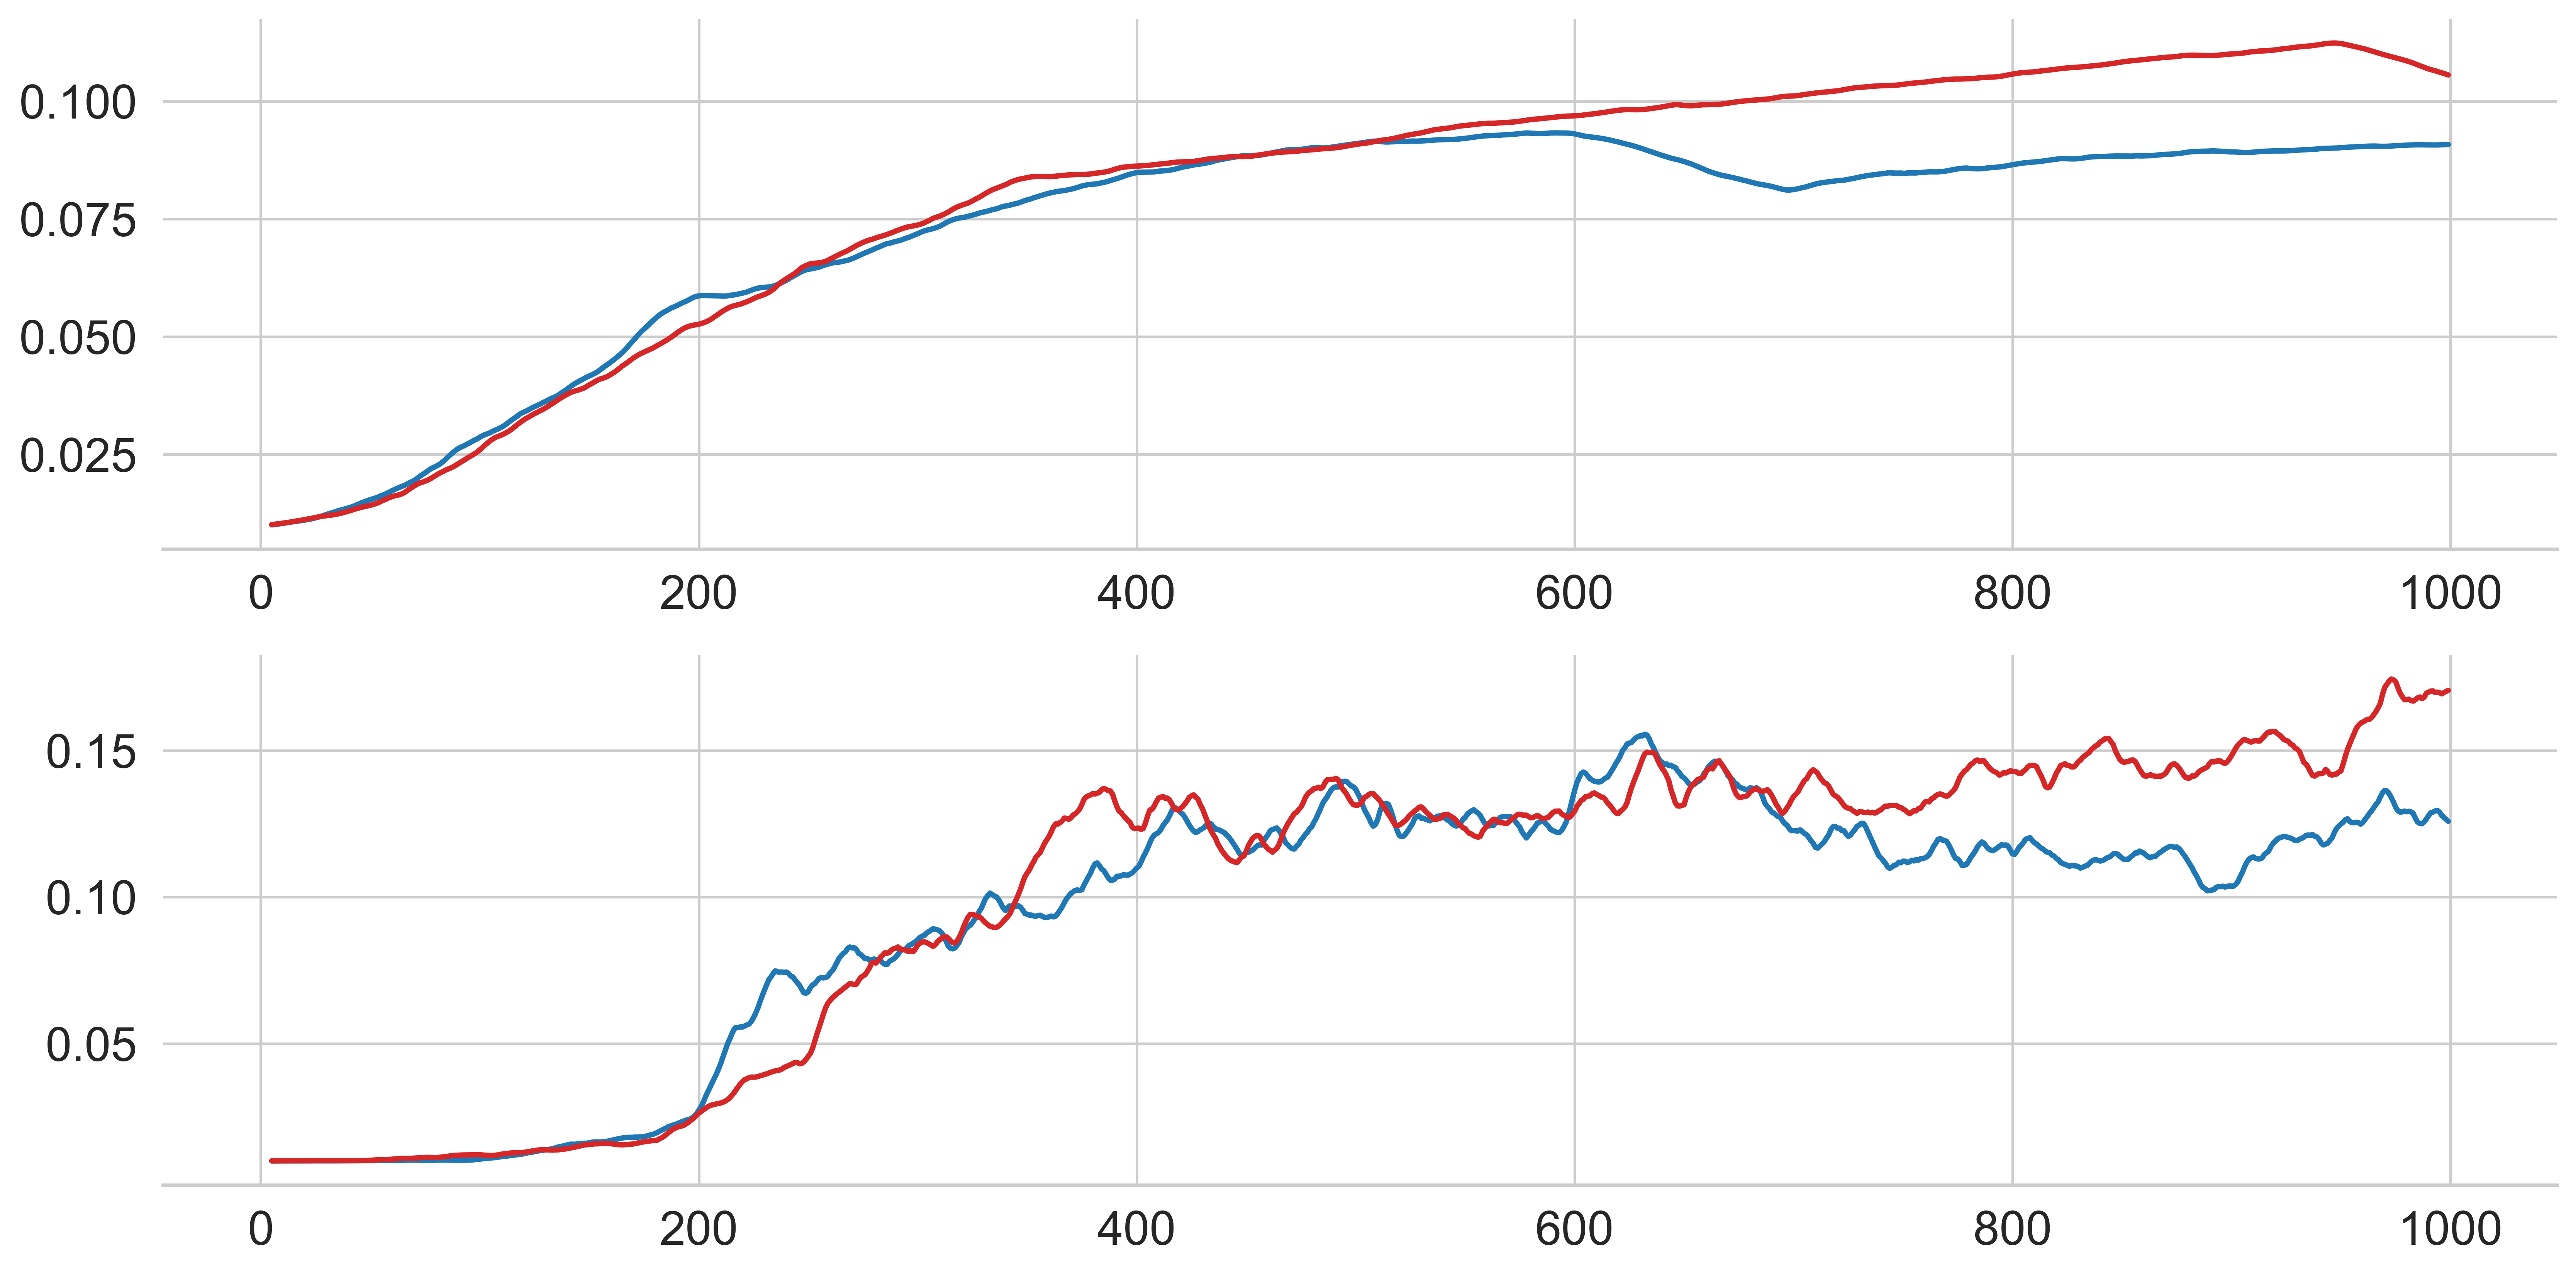

In [7]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_EXPERIENCE_U), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_EXPERIENCE_U), color=c2, lw=2, ax=ax[0])

sns.lineplot(x=demand_df.index, y=smooth(supply_df.P1_EXPERIENCE_U), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=demand_df.index, y=smooth(supply_df.P2_EXPERIENCE_U), color=c2, lw=2, ax=ax[1])

In [18]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

import MaaSSim.utils

In [19]:
params = MaaSSim.utils.get_config('glance.json')

params.threshold_u = 0.005
params.max_revenue = 4000 # maximum revenue with the initial fare
params.alpha = 0.6
params.initial_capital = 50000
params.expense_per_day = 500
params.random_ini_position = False
params.step_size = 0.2 # euro/km
params.min_fare, params.max_fare  = 0.0, 3.0
params.initial_fares = (3.0,0.0)

params.nD = 20 # 1000
params.turnover_interval = 20 #50 #---------------------------------
params.nP = 2000
params.nV = 200

In [21]:
fares = np.arange(params.min_fare, params.max_fare+params.step_size, params.step_size)
fares = np.round(fares, 1)
max_i = len(fares)-1
fares

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. ])

In [22]:
fare_grid = np.array([[(x, y) for y in fares] for x in fares])
fare_grid = np.round(fare_grid, 1)
fare_grid

array([[[0. , 0. ],
        [0. , 0.2],
        [0. , 0.4],
        [0. , 0.6],
        [0. , 0.8],
        [0. , 1. ],
        [0. , 1.2],
        [0. , 1.4],
        [0. , 1.6],
        [0. , 1.8],
        [0. , 2. ],
        [0. , 2.2],
        [0. , 2.4],
        [0. , 2.6],
        [0. , 2.8],
        [0. , 3. ]],

       [[0.2, 0. ],
        [0.2, 0.2],
        [0.2, 0.4],
        [0.2, 0.6],
        [0.2, 0.8],
        [0.2, 1. ],
        [0.2, 1.2],
        [0.2, 1.4],
        [0.2, 1.6],
        [0.2, 1.8],
        [0.2, 2. ],
        [0.2, 2.2],
        [0.2, 2.4],
        [0.2, 2.6],
        [0.2, 2.8],
        [0.2, 3. ]],

       [[0.4, 0. ],
        [0.4, 0.2],
        [0.4, 0.4],
        [0.4, 0.6],
        [0.4, 0.8],
        [0.4, 1. ],
        [0.4, 1.2],
        [0.4, 1.4],
        [0.4, 1.6],
        [0.4, 1.8],
        [0.4, 2. ],
        [0.4, 2.2],
        [0.4, 2.4],
        [0.4, 2.6],
        [0.4, 2.8],
        [0.4, 3. ]],

       [[0.6, 0. ],
        [0.6, 

In [23]:
p1_i = np.where(fares == params.initial_fares[0])[0][0]
p2_i = np.where(fares == params.initial_fares[1])[0][0]

In [24]:
p1_i,p2_i

(15, 0)

In [28]:
fare_grid[p2_i, p1_i][1]

3.0

In [27]:
fare_grid[p2_i, p1_i][0]

0.0

In [41]:
alpha = '0.0'
demand_df = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format(alpha))

demand_df.P2_revenue

0        0.00000
1       27.47260
2       52.02020
3       71.04580
4       60.19680
         ...    
995    536.86920
996    548.47436
997    509.91444
998    533.41680
999    501.59872
Name: P2_revenue, Length: 1000, dtype: float64